In [1]:
%config InlineBackend.figure_formats = ['svg']

from pf2barcode.imports import import_CCLE
from anndata import AnnData
import scanpy as sc
import pandas as pd

X = import_CCLE()

# Get rid of cells with no barcode
X = X[X.obs["SW"] != "unknown"]

# remove cells with barcodes having less than 10 cells
good_SW = X.obs["SW"].value_counts().index[X.obs["SW"].value_counts() > 5]
X = X[X.obs["SW"].isin(good_SW)]

/home/asm/.cache/pypoetry/virtualenvs/pf2barcode-Hbu_9TGN-py3.12/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [2]:
pcadata = AnnData(X.obsm["X_pca"], obs=X.obs, var=pd.DataFrame(index=[f'PC{i}' for i in range(1, X.obsm["X_pca"].shape[1] + 1)]))
pcadata.X /= pcadata.X.mean(axis=1, keepdims=True)

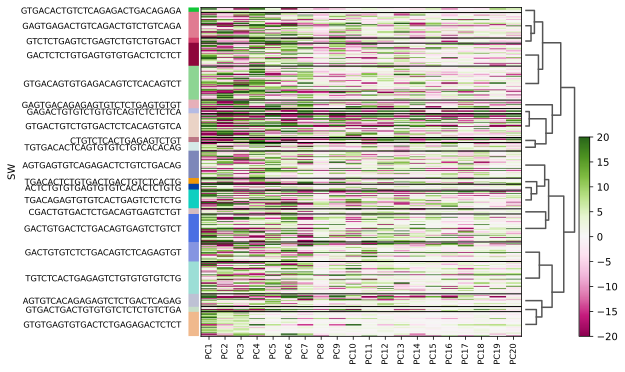

In [3]:
sc.pl.heatmap(pcadata, pcadata.var_names, groupby="SW", dendrogram=True, vmax=20.0, vmin=-20.0, cmap="PiYG")

In [4]:
X[:, "AXL"].varm["PCs"]

ArrayView([[-0.0116694 , -0.00752432,  0.00351474,  0.00655675,
            -0.00785442,  0.01117657, -0.0122826 ,  0.0027041 ,
             0.00613946,  0.00427256, -0.01418134,  0.00140467,
            -0.00258827,  0.01793838, -0.00883939,  0.00390604,
            -0.00013945,  0.00620741,  0.00224574, -0.00392639]])

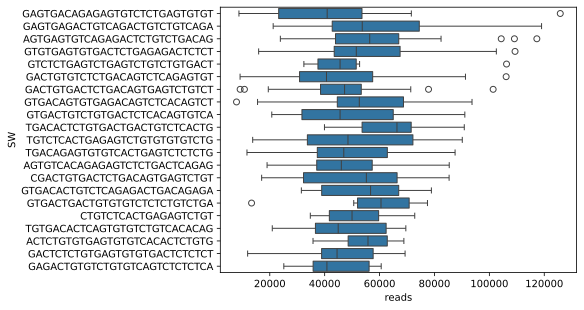

In [5]:
import seaborn as sns

df = pd.DataFrame({"reads": X.obs["n_counts"], "SW": X.obs["SW"]})

sns.boxplot(data=df, x="reads", y="SW");

## Stats

In [6]:
from scipy.stats import f_oneway

comp = pcadata



In [7]:
from gseapy import prerank, dotplot

geneSets = [
        "GO_Biological_Process_2021",
        "GO_Cellular_Component_2021",
    ]

df = prerank(
    pd.Series(H[:, 19], index=X.var_names),
    gene_sets=geneSets,
    organism="Human",
    no_plot=True,
    threads=20,
)

dotplot(df.res2d,
        column="FDR q-val",
        title='KEGG_2016',
        size=6, # adjust dot size
        figsize=(4,5), cutoff=0.25, show_ring=False);

NameError: name 'H' is not defined

In [ ]:
df.res2d.loc[df.res2d["FDR q-val"] < 0.1, :]

In [ ]:
pd.Series(H[:, 20], index=X.var_names).sort_values(ascending=False).head(20)